# Airline passenger satisfaction analysis

In [ ]:
%pip install kagglehub
%pip install scikit-learn
%pip install seaborn

In [116]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


## Preprocessing

### Data uploading

In [117]:
path = kagglehub.dataset_download("teejmahal20/airline-passenger-satisfaction")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\z004ve1z\.cache\kagglehub\datasets\teejmahal20\airline-passenger-satisfaction\versions\1


In [118]:
train_data = pd.read_csv(f"{path}/train.csv")
train_data.shape

(103904, 25)

In [119]:
test_data = pd.read_csv(f"{path}/test.csv")
test_data.shape

(25976, 25)

In [120]:
df = pd.concat([train_data, test_data], axis = 0, ignore_index= True)
df.shape

(129880, 25)

### Data transformation

__Requirements on preprocessing:__

- remove rows based on subsetting
- derive new columns
- use aggregation operators
- treat missing values ✅

(Any two of the following operations are mandatory)

In [121]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [132]:
df.describe()

# Here we see that none of numeric columns has negative number neither strange ouliers.
# Also, we can see that average rating of multiple services is lower than average grade "3".

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.045465
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.416353
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [123]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

In [124]:
df.drop(columns=["Unnamed: 0", "id"], inplace=True)
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [125]:
##TODO remove id columns
# derive new columns

In [126]:
arrival_delay_median = df["Arrival Delay in Minutes"].median()
df["Arrival Delay in Minutes"] = df["Arrival Delay in Minutes"].fillna(arrival_delay_median)
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [127]:
# Splitting data into train and test set

X = df.loc[:, df.columns != 'satisfaction']
y = df['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 123)

### Data exploration

Text(0.5, 1.0, 'Number of passengers by their Gender')

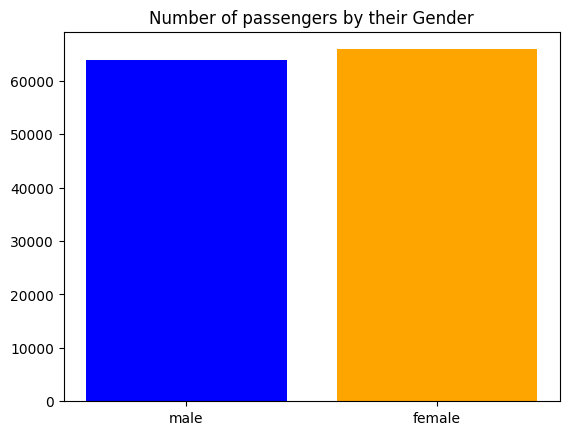

In [128]:
# Exploring number of male and female
number_of_male = (df["Gender"] == "Male").sum()
number_of_female = (df["Gender"] == "Female").sum()


plt.bar(x=["male", "female"], height=[number_of_male, number_of_female], color = ["blue", "orange"])
plt.title("Number of passengers by their Gender")

In [129]:
# Exploring target value 
df["satisfaction"].value_counts()

satisfaction
neutral or dissatisfied    73452
satisfied                  56428
Name: count, dtype: int64

<Axes: >

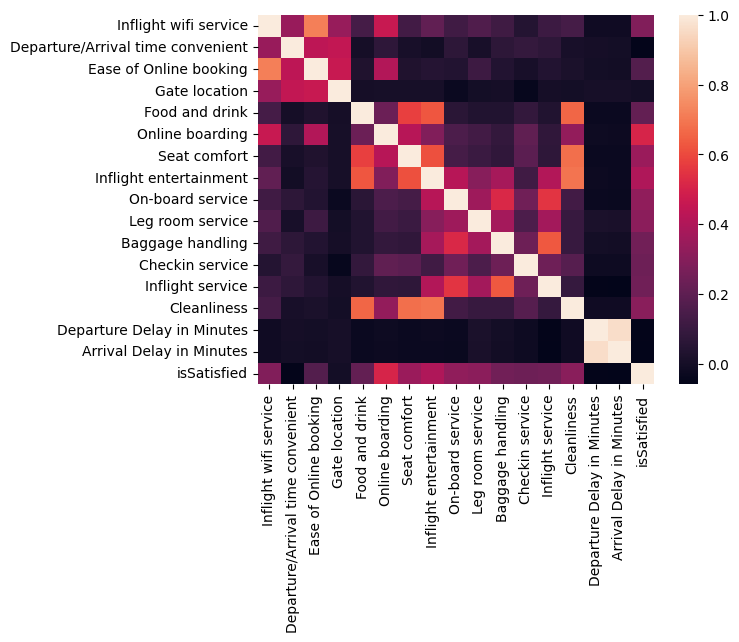

In [130]:
# Correlation between 
X_train["isSatisfied"] = (y_train == "satisfied")
train_features = X_train.loc[:, "Inflight wifi service" : ]
corr = train_features.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

## Analysis

__Use any classifier. Choose one of the following two options:__

- perform train/test split✅
- use crossvalidation

Also, evaluate and compare at least two algorithms of different types (e.g. logistic regression and random forest).

### Logistic Regresstion model

In [ ]:
lr_model = LogisticRegression()


### Decition Tree model

In [ ]:
dt_model = DecisionTreeClassifier()

### Random Forest model

In [ ]:
rf_model = RandomForestClassifier()

__Requirements on hyperparameter tuning__

If the chosen classifier has any hyperparameters that can be tuned, use one of the following methods:

- try several configurations and describe the best result in the final report
- perform grid search or other similar automatic method
- once you have tuned hyperparameters on a dedicated development (training) set, e.g. with GridSearchCV, you can
- retrain the model on the complete training data, as e.g. described here and here